# Lab 3.1 Analysis of Variance (ANOVA)

In [2]:
#First, import the libaries you think you'll need
import numpy as np
import scipy.stats as st
from scipy.io import loadmat
import statistics as stats
import matplotlib.pyplot as plt
%matplotlib inline

# Also note, you can find a nice online tutorial on this subject here: 
# https://reneshbedre.github.io/blog/anova.html
# ANOVA is one of the most commonly used stats tools, so many video and online
# resources exist.  If you find an especially good one, please tell me.

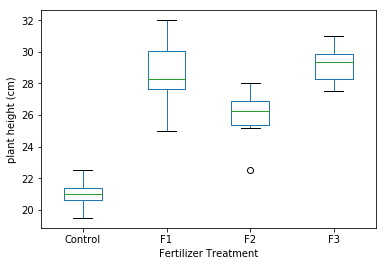

In [5]:
# load the panda packages
import pandas as pd
# load data file
d = pd.read_csv("ANOVA_fertilizer_treatment.txt", sep="\t")
# generate a boxplot to see the data distribution by treatments. Using boxplot, we can easily detect the differences 
# between different treatments
d.boxplot(column=['Control', 'F1', 'F2', 'F3'], grid=False)
plt.xlabel('Fertilizer Treatment')
plt.ylabel('plant height (cm)')

### Based on the lecture notes in class and from the Portland state university website, we propose a null and alternative hypothesis.

$H_0$: All groups have the same central mean

$H_1$: The means are different from each other

In this case, we perform a one way ANOVA to determine whether our null hypothesis ($H_0$) is true or not.

In [6]:
# stats f_oneway functions takes the groups as input and returns F and P-value
fvalue, pvalue = st.f_oneway(d['Control'], d['F1'], d['F2'], d['F3'])
print(fvalue, pvalue)

27.4647733479 2.71199440854e-07


#### The null hypothesis is false.
Also, look at the lecture notes for how the F-statistic is calculated.  The p-value is determined by looking up that F-statistic in the F-distribution.  The p-value is much less than 0.05, so we can reject the null.  However, if we want to know more, such as which of the groups are actuall different from which other groups, we need more information.

In [7]:
# get ANOVA table as R like output
import statsmodels.api as sm
from statsmodels.formula.api import ols
# reshape the d dataframe suitable for statsmodels package 
d_melt = pd.melt(d.reset_index(), id_vars=['index'], value_vars=['Control', 'F1', 'F2', 'F3'])
# replace column names
d_melt.columns = ['index', 'treatments', 'value']
# Ordinary Least Squares (OLS) model
model = ols('value ~ C(treatments)', data=d_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

/Users/jdlund/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


,sum_sq,df,F,PR(>F)
C(treatments),251.440000,3.0,27.464773,2.711994e-07
Residual,61.033333,20.0,NaN,NaN


#### You can compare the above to the table we made in class.  Both of these python packages are valid ways to solve the basic problem.

However, note that we need to apply Tukey's test to tell which groups are different from which other groups.

In [9]:
# load packages
from statsmodels.stats.multicomp import pairwise_tukeyhsd
# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog=d_melt['value'], groups=d_melt['treatments'], alpha=0.05)
print(m_comp)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
 group1 group2 meandiff  lower   upper  reject
----------------------------------------------
Control   F1     7.6     4.7769 10.4231  True 
Control   F2    4.8667   2.0436  7.6897  True 
Control   F3     8.2     5.3769 11.0231  True 
   F1     F2   -2.7333  -5.5564  0.0897 False 
   F1     F3     0.6    -2.2231  3.4231 False 
   F2     F3    3.3333   0.5103  6.1564  True 
----------------------------------------------


#### Here we can see that all of the fertilizer treatments are different from the control, and that treatments F2 and F3 are different from each other but not from F1.

This makes sense if you look at the boxplot graph above.  Also note that the lower and upper ranges given above suggest a real difference if the 95% confidence range does not include 0.  (If it includes 0, then there's a chance that there's really no difference at all.)

This is the extent of what you need for the homework, but there are few more tests you may wish to explore here:
https://reneshbedre.github.io/blog/anova.html 